All code was hidden but the main benchmark function. Outputs remain.

The retrieval process uses all models but primarily relies on embedding_summary_nonai because it represents the pre-computed embeddings for the description_nonai field. This field serves as the primary comparison feature for this benchmarking run, instead of doing it on every single similarity category.

Note on results:

Precision, recall, and F1-score remain low across dataset sizes, indicating that the model's predictive performance does not significantly improve with the reduced dataset. This is due to the way the expected and retreived sets are constructed, assuming all target models are relate. Accuracy remains relatively high and stable, suggesting that the model's predictions are skewed toward the majority class. Smaller datasets lead to reduced processing times but do not improve the predictive metrics. The lack of significant changes in the metrics suggests that the dataset size does not really affect performance, but does impact processing time.

2024-12-03 12:45:00,255 [INFO] SpaCy Pipeline Components: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
Starting Relevancy Benchmarking: Impact of Dataset Size on SNS Performance...
2024-12-03 12:45:00,664 [INFO] Successfully connected to Neo4j.
2024-12-03 12:45:00,664 [INFO] Loading SentenceTransformer model...
2024-12-03 12:45:00,670 [INFO] Use pytorch device_name: cpu
2024-12-03 12:45:00,670 [INFO] Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2024-12-03 12:45:01,222 [INFO] SentenceTransformer model loaded successfully.
2024-12-03 12:45:01,222 [INFO] Fetching all models and their embeddings from Neo4j...


C:\Users\noski\PycharmProjects\Semantic_Search_Thingiverse\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


2024-12-03 12:45:01,755 [INFO] Fetched 991 models from Neo4j.
2024-12-03 12:45:01,771 [INFO] Computing embeddings for 'description_nonai'...


Embedding 'description_nonai': 100%|██████████| 16/16 [00:11<00:00,  1.43it/s]

2024-12-03 12:45:12,986 [INFO] Embedding computation completed in 11.21 seconds.
2024-12-03 12:45:12,986 [INFO] Computing embeddings for 'description_ai'...



Embedding 'description_ai': 100%|██████████| 16/16 [00:05<00:00,  2.81it/s]

2024-12-03 12:45:18,683 [INFO] AI embedding computation completed in 16.91 seconds.
2024-12-03 12:45:18,683 [INFO] Computing embeddings for model names...


2024-12-03 12:45:20,632 [INFO] Completed computing name embeddings.
2024-12-03 12:45:20,637 [INFO] Evaluating with Dataset Size: 991
2024-12-03 12:45:20,637 [INFO] Trial 1/1 for Dataset Size 991
2024-12-03 12:45:20,821 [INFO] Evaluating with Dataset Size: 990
2024-12-03 12:45:20,821 [INFO] Trial 1/1 for Dataset Size 990
2024-12-03 12:45:21,012 [INFO] Evaluating with Dataset Size: 989
2024-12-03 12:45:21,012 [INFO] Trial 1/1 for Dataset Size 989
2024-12-03 12:45:21,209 [INFO] Evaluating with Dataset Size: 988
2024-12-03 12:45:21,214 [INFO] Trial 1/1 for Dataset Size 988
2024-12-03 12:45:21,373 [INFO] Evaluating with Dataset Size: 987
2024-12-03 12:45:21,373 [INFO] Trial 1/1 for Dataset Size 987
2024-12-03 12:45:21,548 [INFO] Evaluating with Dataset Size: 986
2024-12-03 12:45:21,548 [INFO] Trial 1/1 for Dataset Size 986
2024-12-03 12:45:21,713 [INFO] Evaluating with Dataset Size: 985
2024-12-03 12:45:21,713 [INFO] Trial 1/1 for Dataset Size 985
2024-12-03 12:45:21,940 [INFO] Evaluating w

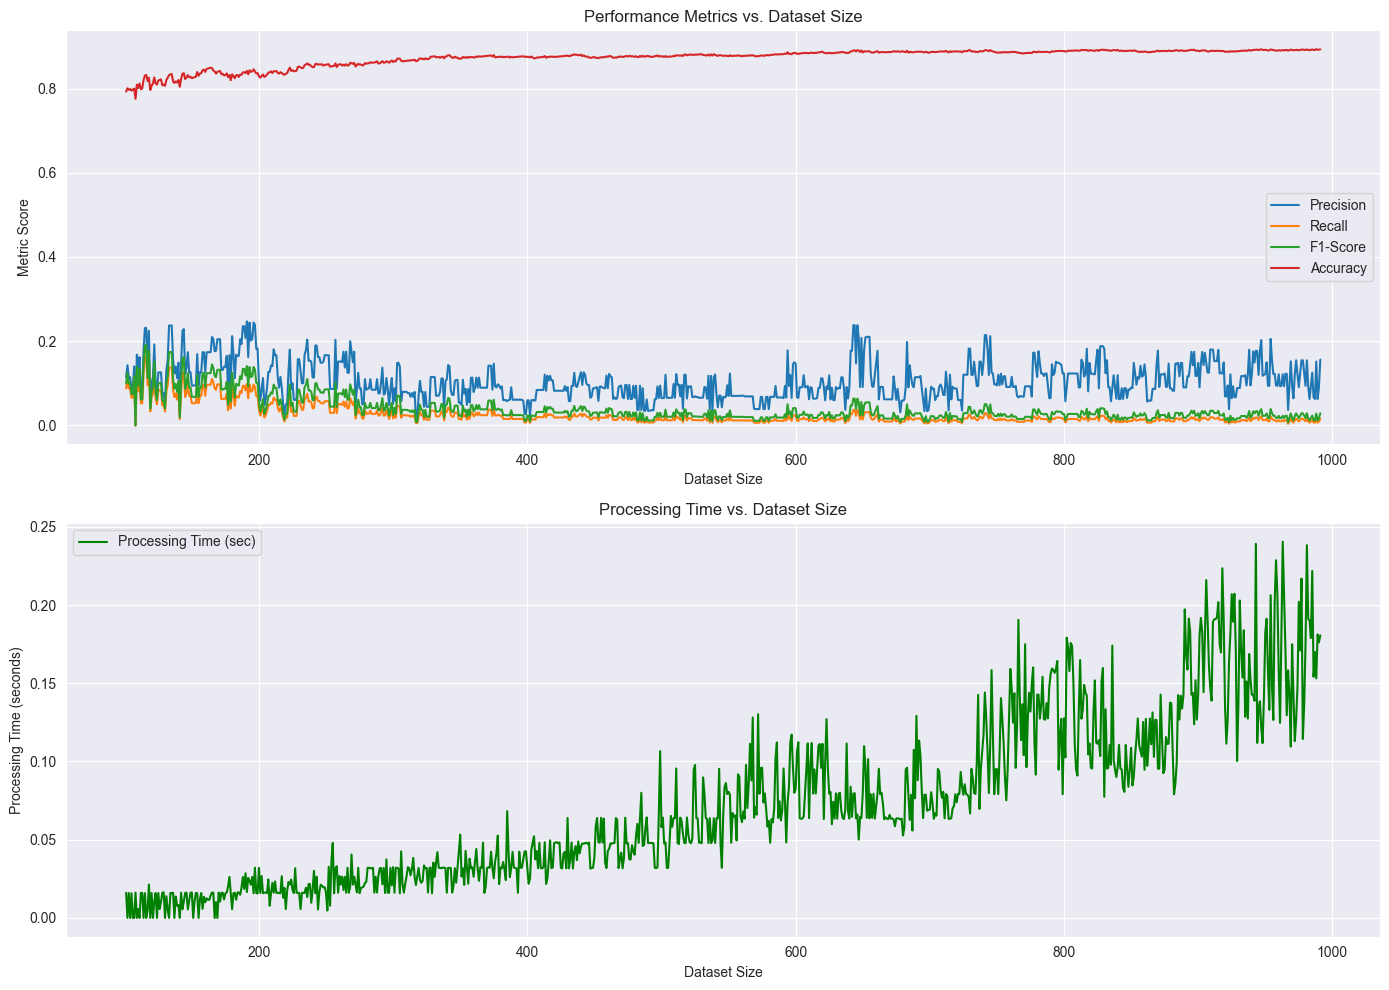

2024-12-03 12:46:29,820 [INFO] Benchmarking completed successfully. Results saved to 'performance_metrics_vs_dataset_size.csv' and 'performance_metrics_vs_dataset_size.png'.


In [11]:
# def main():
#     """
#     Main function to perform benchmarking: Impact of Dataset Size on SNS Performance.
#     """
#     print("Starting Relevancy Benchmarking: Impact of Dataset Size on SNS Performance...")
# 
#     graph_db = connect_to_neo4j(NEO4J_URI, NEO4J_USER, NEO4J_PASSWORD)
# 
#     logging.info("Loading SentenceTransformer model...")
#     model = SentenceTransformer('all-MiniLM-L6-v2')
#     logging.info("SentenceTransformer model loaded successfully.")
# 
#     df_models_master = fetch_all_models(graph_db, model)
# 
#     all_model_ids_master = set(df_models_master['id'])
# 
#     random.seed(42)
# 
#     num_initial_targets = min(100, len(df_models_master))
#     target_model_ids = set(random.sample(list(all_model_ids_master), num_initial_targets))
#     noise_model_ids = all_model_ids_master - target_model_ids
# 
#     df_models_master['is_target'] = df_models_master['id'].isin(target_model_ids)
# 
#     embeddings_all = np.vstack(df_models_master['embedding_summary_nonai'])
#     id_to_index = {model_id: idx for idx, model_id in enumerate(df_models_master['id'])}
# 
#     metrics_per_size = {
#         'Dataset_Size': [],
#         'Precision': [],
#         'Recall': [],
#         'F1-Score': [],
#         'Accuracy': [],
#         'Processing_Time_sec': []
#     }
# 
#     current_model_ids = deepcopy(all_model_ids_master)
#     df_current_master = df_models_master.copy()
# 
#     num_trials = 1
# 
#     while len(current_model_ids) > 100:
#         dataset_size = len(current_model_ids)
#         logging.info(f"Evaluating with Dataset Size: {dataset_size}")
#         metrics_per_size['Dataset_Size'].append(dataset_size)
# 
#         total_metrics = {'Precision': 0.0, 'Recall': 0.0, 'F1-Score': 0.0, 'Accuracy': 0.0}
#         total_processing_time = 0.0
# 
#         for trial in range(num_trials):
#             logging.info(f"Trial {trial + 1}/{num_trials} for Dataset Size {dataset_size}")
# 
#             removed_model = random.choice(list(current_model_ids))
#             trial_model_ids = current_model_ids - {removed_model}
#             df_trial = df_models_master[df_models_master['id'].isin(trial_model_ids)].reset_index(drop=True)
# 
#             embeddings_trial = np.vstack(df_trial['embedding_summary_nonai'])
#             id_to_index_trial = {model_id: idx for idx, model_id in enumerate(df_trial['id'])}
#             all_ids_trial = set(df_trial['id'])
# 
#             target_model_ids_trial = set(df_trial[df_trial['is_target']]['id'])
# 
#             start_time = time.time()
# 
#             aggregated_metrics = {'TP': 0, 'FP': 0, 'FN': 0, 'TN': 0}
# 
#             for idx, row in df_trial[df_trial['is_target']].iterrows():
#                 query_id = row['id']
#                 query_embedding = row['embedding_summary_nonai']
#                 if query_embedding.size == 0:
#                     continue
# 
#                 similarities = compute_cosine_similarity(query_embedding, embeddings_trial)
# 
#                 top_k = 10
#                 similar_indices = similarities.argsort()[-top_k - 1:-1][::-1]
#                 retrieved_ids = set(df_trial['id'].iloc[similar_indices])
#                 retrieved_ids.discard(query_id)
# 
#                 target_ids = target_model_ids_trial - {query_id}
# 
#                 evaluation = evaluate_retrieval(query_id, retrieved_ids, target_ids, all_ids_trial)
# 
#                 aggregated_metrics['TP'] += evaluation['TP']
#                 aggregated_metrics['FP'] += evaluation['FP']
#                 aggregated_metrics['FN'] += evaluation['FN']
#                 aggregated_metrics['TN'] += evaluation['TN']
# 
#             end_time = time.time()
#             processing_time = end_time - start_time
# 
#             trial_metrics = compute_metrics(aggregated_metrics)
# 
#             total_metrics['Precision'] += trial_metrics['Precision']
#             total_metrics['Recall'] += trial_metrics['Recall']
#             total_metrics['F1-Score'] += trial_metrics['F1-Score']
#             total_metrics['Accuracy'] += trial_metrics['Accuracy']
#             total_processing_time += processing_time
# 
#             current_model_ids = trial_model_ids.union({removed_model})
# 
#         avg_precision = total_metrics['Precision'] / num_trials
#         avg_recall = total_metrics['Recall'] / num_trials
#         avg_f1 = total_metrics['F1-Score'] / num_trials
#         avg_accuracy = total_metrics['Accuracy'] / num_trials
#         avg_processing_time = total_processing_time / num_trials
# 
#         metrics_per_size['Precision'].append(avg_precision)
#         metrics_per_size['Recall'].append(avg_recall)
#         metrics_per_size['F1-Score'].append(avg_f1)
#         metrics_per_size['Accuracy'].append(avg_accuracy)
#         metrics_per_size['Processing_Time_sec'].append(avg_processing_time)
# 
#         current_model_ids = current_model_ids - {removed_model}
# 
#         if removed_model in target_model_ids:
#             target_model_ids = target_model_ids - {removed_model}
#         else:
#             noise_model_ids = noise_model_ids - {removed_model}
# 
#         if len(target_model_ids) == 0:
#             logging.info("No target models left in the dataset.")
#             break
# 
#     df_metrics = pd.DataFrame(metrics_per_size)
# 
#     plt.figure(figsize=(14, 10))
# 
#     plt.subplot(2, 1, 1)
#     sns.lineplot(data=df_metrics, x='Dataset_Size', y='Precision', label='Precision')
#     sns.lineplot(data=df_metrics, x='Dataset_Size', y='Recall', label='Recall')
#     sns.lineplot(data=df_metrics, x='Dataset_Size', y='F1-Score', label='F1-Score')
#     sns.lineplot(data=df_metrics, x='Dataset_Size', y='Accuracy', label='Accuracy')
#     plt.title('Performance Metrics vs. Dataset Size')
#     plt.xlabel('Dataset Size')
#     plt.ylabel('Metric Score')
#     plt.legend()
#     plt.grid(True)
# 
#     plt.subplot(2, 1, 2)
#     sns.lineplot(data=df_metrics, x='Dataset_Size', y='Processing_Time_sec', label='Processing Time (sec)', color='green')
#     plt.title('Processing Time vs. Dataset Size')
#     plt.xlabel('Dataset Size')
#     plt.ylabel('Processing Time (seconds)')
#     plt.legend()
#     plt.grid(True)
# 
#     plt.tight_layout()
#     plt.savefig("performance_metrics_vs_dataset_size.png")
#     plt.show()
# 
#     df_metrics.to_csv("performance_metrics_vs_dataset_size.csv", index=False)
#     logging.info("Benchmarking completed successfully. Results saved to 'performance_metrics_vs_dataset_size.csv' and 'performance_metrics_vs_dataset_size.png'.")
# 
# 
# if __name__ == "__main__":
#     main()
